In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import torch
import os
from rdkit import Chem
from rdkit.Geometry import Point3D

In [3]:
from utils_eval import build_pdb_dict, center2zero, pp_match
from pp_matching_specific_site import compute_center

In [4]:
import py3Dmol
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, Image
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 600, 600

In [23]:
# ligand_name = '1ywn_A_rec_1ywn_lif_lig_tt_docked_0'
# ligand_name = '4b81_B_rec_4ara_c56_lig_tt_min_0'
# ligand_name = '1lhu_A_rec_1lhn_aon_lig_tt_min_0'
# ligand_name = '4b84_A_rec_4b84_z5k_lig_tt_min_0'
# ligand_name = '3fu5_A_rec_5ni6_dj3_lig_tt_min_0'
# ligand_name = '5hbh_A_rec_5idn_6a7_lig_tt_min_0'
# ligand_name = '5aen_A_rec_5ni2_dj3_lig_tt_min_0'
# ligand_name = '3d3e_B_rec_4ijw_1eq_lig_tt_min_0'
# ligand_name = '4yyz_B_rec_3ey4_352_lig_tt_docked_12'
# ligand_name = '4h7c_A_rec_3r58_nps_lig_tt_min_0'
# ligand_name = '3ey4_C_rec_4k1l_sff_lig_tt_min_0'

# ligand_name = '3hfg_A_rec_3hfg_17r_lig_tt_min_0'
# ligand_name = '3ey4_C_rec_5pgu_8k4_lig_tt_min_0'  # 0.11 0.10
# ligand_name = '5ni2_A_rec_5aen_dp8_lig_tt_min_0'
# ligand_name = '3fu5_A_rec_5ni6_dj3_lig_tt_min_0'
# ligand_name = '4yyz_B_rec_2ilt_nn1_lig_tt_min_0'  # 0.16 0.20 
# ligand_name = '4bnn_A_rec_4bnm_tcu_lig_tt_min_0'
# ligand_name = '4yvx_A_rec_1s2a_imn_lig_tt_min_0'
# ligand_name = '3czr_B_rec_4bb5_hd2_lig_tt_min_0'
# ligand_name = '3czr_A_rec_2ilt_nn1_lig_tt_min_0'
# ligand_name = '4b84_A_rec_4btl_5gz_lig_tt_min_0'
# ligand_name = '3fue_A_rec_3ftv_11x_lig_tt_min_0'  # 0.04 0.05
# ligand_name = '4bnk_B_rec_4d44_ja3_lig_tt_min_0'  # 0.26 0.27
# ligand_name = '3qqp_B_rec_4k1l_sff_lig_tt_min_0'
# ligand_name = '4wdu_A_rec_3r94_flr_lig_tt_min_0'  # 0.37 0.27
# ligand_name = '4alj_A_rec_4bnf_pv4_lig_tt_docked_0'  # 0.24 0.24
# ligand_name = '1ejj_A_rec_1o99_2pg_lig_tt_docked_0'
# ligand_name = '4h96_B_rec_4h95_06u_lig_tt_min_0'  # 0.40 0.42
# ligand_name = '2oa6_D_rec_4kvi_1sv_lig_tt_min_0'  # 0.36 0.41
# ligand_name = '4hx5_B_rec_3bzu_a21_lig_tt_min_0'
# ligand_name = '5pgy_D_rec_3bzu_a21_lig_tt_min_0'
# ligand_name = '5pgv_A_rec_3bzu_a21_lig_tt_min_0'
# ligand_name = '4kux_B_rec_4kvw_jf4_lig_tt_min_0'  # 0.61 0.63
# ligand_name = '4bnk_B_rec_4bnl_w1g_lig_tt_min_0'
# ligand_name = '4b82_B_rec_4ara_c56_lig_tt_min_0'  # 0.42 0.53
# ligand_name = '4pm0_A_rec_4y2b_epk_lig_tt_min_0'
# ligand_name = '4ms6_A_rec_3fuh_5h1_lig_tt_min_0'  # 0.02 0.02
# ligand_name = '5ivg_B_rec_4kvy_jf1_lig_tt_docked_9'  # 0.61 0.69
# ligand_name = '3r8h_A_rec_3r8h_zom_lig_tt_min_0'
# ligand_name = '1aoe_A_rec_3qlr_qlr_lig_tt_docked_4'  # 0.19 0.28
# ligand_name = '2ilt_A_rec_3ey4_352_lig_tt_min_0'  # 0.70 0.71
# ligand_name = '2g1q_A_rec_1x88_nat_lig_tt_min_0'  # 0.59 0.59
# ligand_name = '5imp_B_rec_4kwd_jf2_lig_tt_min_0'  # 0.54 0.55
# ligand_name = '4d45_A_rec_4ali_tcl_lig_tt_min_0'  # 0.57 0.52
# ligand_name = '5ivg_B_rec_4kvw_jf4_lig_tt_min_0'
# ligand_name = '2rbe_C_rec_3byz_h11_lig_tt_min_0'
# ligand_name = '2whr_A_rec_3zlv_hi6_lig_tt_min_0'
# ligand_name = '4hmn_A_rec_3ufy_npx_lig_tt_min_0'
# ligand_name = '4h7c_A_rec_3r6i_jms_lig_tt_min_0'
# ligand_name = '1pha_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1phd_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1phg_A_rec_1phe_piy_lig_tt_min_0'
# ligand_name = '1phg_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1p2y_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1p2y_A_rec_1phe_piy_lig_tt_min_0'
# ligand_name = '5lgq_D_rec_4ikp_4ik_lig_tt_docked_1'
# ligand_name = '1c8j_A_rec_1p2y_nct_lig_tt_min_0'
# ligand_name = '1l5l_A_rec_1l4l_xyd_lig_tt_min_0'
# ligand_name = '4l0s_A_rec_5al5_jl9_lig_tt_min_0'
# ligand_name = '2pg2_A_rec_2wog_zzd_lig_tt_min_0'
# ligand_name = '4yur_A_rec_3cok_anp_lig_tt_min_0'
# ligand_name = '3ny8_A_rec_4ldo_ale_lig_tt_docked_4'  # remove atom 11

# ligand_name = '4mrg_A_rec_5bzf_4x3_lig_tt_docked_2'
# ligand_name = '1k4h_A_rec_1p0b_pq0_lig_tt_docked_0'

# ligand_name = '3nbq_B_rec_3nbq_urf_lig_tt_docked_2'
# ligand_name = '3p1c_B_rec_3p1f_3pf_lig_tt_min_0'
# ligand_name = '5swg_A_rec_5swt_71a_lig_tt_min_0'
# ligand_name = '3euf_A_rec_3nbq_urf_lig_tt_min_0'
# ligand_name = '2vce_A_rec_2vce_tc7_lig_tt_docked_0'
# ligand_name = '4xud_A_rec_5lsa_dnc_lig_tt_docked_2'
# ligand_name = '1eoc_A_rec_2buz_4nc_lig_tt_docked_4'
# ligand_name = '1y5x_A_rec_4puk_2wu_lig_tt_min_0'
# ligand_name = '2bur_A_rec_1eoc_4nc_lig_tt_min_0'
# ligand_name = '1k4h_A_rec_1p0b_pq0_lig_tt_docked_0'
# ligand_name = '1eob_A_rec_2buz_4nc_lig_tt_min_0'
# ligand_name = '4mrg_A_rec_5bzf_4x3_lig_tt_docked_2'
# ligand_name = '4xuc_A_rec_5lsa_dnc_lig_tt_min_0'
# ligand_name = '1kwc_B_rec_1eir_bpy_lig_tt_min_0'
# ligand_name = '2vce_A_rec_2vce_tc7_lig_tt_min_0'
# ligand_name = '1eoc_A_rec_1eoc_4nc_lig_tt_min_0'
# ligand_name = '5mpz_A_rec_5mqg_f31_lig_tt_docked_3'
# ligand_name = '2buq_A_rec_2buz_4nc_lig_tt_min_0'
# ligand_name = '4mrf_A_rec_4mre_2c9_lig_tt_min_0'
# ligand_name = '1k9s_D_rec_1a69_fmb_lig_tt_min_0'
# ligand_name = '5i00_A_rec_1enu_apz_lig_tt_min_0'
# ligand_name = '1eoc_A_rec_2buz_4nc_lig_tt_min_0'
# ligand_name = '2bur_A_rec_2buz_4nc_lig_tt_min_0'
# ligand_name = '3eue_A_rec_3nbq_urf_lig_tt_min_0'
# ligand_name = '4xue_B_rec_5lsa_dnc_lig_tt_docked_10'
# ligand_name = '5jxq_A_rec_1p0b_pq0_lig_tt_min_0'
# ligand_name = '1eob_A_rec_2buu_4nc_lig_tt_min_0'
# ligand_name = '3rr4_A_rec_1p0b_pq0_lig_tt_min_0'
# ligand_name = '2vch_A_rec_2vce_tc7_lig_tt_min_0'
# ligand_name = '2buu_A_rec_1eoc_4nc_lig_tt_min_0'
# ligand_name = '4xuc_A_rec_5lsa_dnc_lig_tt_docked_7'

# ligand_name = '5ehq_A_rec_1j06_ae3_lig_tt_min_0'

# ligand_name = '1pr5_A_rec_3occ_dih_lig_tt_min_0'
# ligand_name = '1oty_A_rec_3occ_dih_lig_tt_docked_18'
# ligand_name = '1ov6_A_rec_3occ_dih_lig_tt_min_0'

# ligand_name = '5uez_A_rec_5uev_88y_lig_tt_min_0'
# ligand_name = '5lvr_A_rec_5fe6_5wz_lig_tt_min_0'
# ligand_name = '5nu3_A_rec_5lpj_xdm_lig_tt_docked_5'

# ligand_name = '4np3_A_rec_5bze_68n_lig_tt_min_0'

# ligand_name = '2xr9_A_rec_5ijs_5jk_lig_tt_min_0'

# ligand_name = '5mhp_A_rec_3waw_dww_lig_tt_docked_17'

# ligand_name = '1e3k_A_rec_1a28_str_lig_tt_docked_2'

# ligand_name = '3h3q_A_rec_3h3q_h13_lig_tt_docked_1'

# ligand_name = '5l0b_A_rec_5l0b_6zm_lig_it1_tt_docked_1'

# ligand_name = '4b85_B_rec_4ara_c56_lig_tt_docked_2'

ligand_name = '1otx_A_rec_4tti_fmc_lig_tt_min_0'

# ligand_name = '4poj_A_rec_4zsh_4xw_lig_tt_docked_3'

# ligand_name = '2evs_A_rec_4h2z_mys_lig_tt_min_0'

# folder_name = ligand_name[ligand_name.rfind('rec')+4:ligand_name.rfind('rec')+8]
folder_name = ligand_name

In [24]:
raw_data_path = '../../data/cleaned_crossdocked_data/raw'
pdb_dict, pdb_rev_dict = build_pdb_dict(raw_data_path)

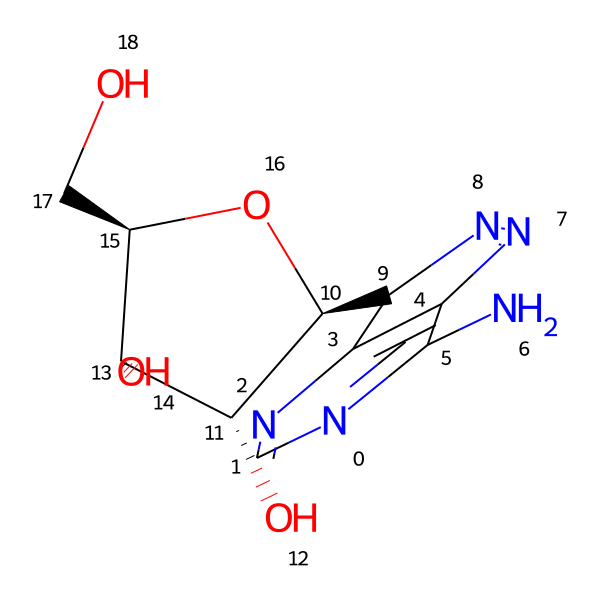

In [25]:
pdb_folder = pdb_rev_dict[ligand_name+'.sdf']
ref_file = os.path.join(raw_data_path, pdb_folder, ligand_name+'.sdf')
ref_m = Chem.MolFromMolFile(ref_file)
ref_m

In [26]:
ref_m.GetNumConformers()

1

In [27]:
conf = ref_m.GetConformer()
atom_positions = conf.GetPositions()

atom_positions

array([[137.7689, 100.4386,  42.6738],
       [136.9085, 100.0223,  41.721 ],
       [136.9854, 100.394 ,  40.4329],
       [137.9727, 101.2297,  40.0447],
       [138.9557, 101.7305,  41.0098],
       [138.7996, 101.2751,  42.4077],
       [139.6543, 101.686 ,  43.3786],
       [139.8076, 102.5322,  40.3528],
       [139.4617, 102.5963,  38.9859],
       [138.3726, 101.8302,  38.7424],
       [137.6358, 101.6221,  37.4605],
       [136.6251, 100.4673,  37.418 ],
       [137.1519,  99.3638,  36.7135],
       [135.4029, 101.0933,  36.7461],
       [135.5173, 100.9841,  35.3282],
       [135.4997, 102.5514,  37.1452],
       [136.9064, 102.8291,  37.3231],
       [134.7721, 102.9512,  38.4017],
       [135.2877, 104.1723,  38.9246]])

In [42]:
# th_data = 'pharmacophore_specific_eval/3r58/4h7c_A_rec_3r58_nps_lig_tt_min_0.pt'
# th_data = os.path.join('pharmacophore_specific_eval', folder_name, ligand_name+'.pt')
# th_data = os.path.join('structure_based', folder_name, ligand_name+'_aromatic.pt')
th_data = os.path.join('ligand_based', folder_name, ligand_name+'_aromatic.pt')
data = torch.load(th_data)
data.target_pos

tensor([[137.8967, 100.8548,  41.3848],
        [137.8902, 100.8255,  41.3857],
        [137.9026, 100.8504,  41.3764],
        [137.8846, 100.8574,  41.3915],
        [137.8834, 100.8415,  41.3599],
        [137.9046, 100.8434,  41.3869],
        [139.6419, 101.6756,  43.3707],
        [139.8097, 102.5094,  40.3621],
        [139.4523, 102.5885,  38.9905],
        [137.9889, 101.7267,  38.0924],
        [138.0170, 101.7286,  38.1010],
        [135.5746, 101.7715,  37.4237],
        [137.1443,  99.3617,  36.6998],
        [135.5690, 101.7413,  37.4076],
        [135.5251, 100.9785,  35.3088],
        [135.5736, 101.7569,  37.4409],
        [136.9019, 102.8262,  37.3094],
        [135.5865, 101.7735,  37.4413],
        [135.2867, 104.1727,  38.9174],
        [137.8967, 100.8548,  41.3848],
        [137.8902, 100.8255,  41.3857],
        [137.9026, 100.8504,  41.3764],
        [137.8846, 100.8574,  41.3915],
        [137.8834, 100.8415,  41.3599],
        [137.9046, 100.8434,  41.3869],


In [43]:
center = compute_center(data['target_pos'], data['Gt_mask']).numpy()
center

array([137.33861 , 101.56231 ,  39.218456], dtype=float32)

In [44]:
for i in range(ref_m.GetNumAtoms()):
    x,y,z = atom_positions[i] - center
    print(x, y, z)
    conf.SetAtomPosition(i,Point3D(x,y,z))

0.43029221191406464 -1.1237092651367249 3.455343731689453
-0.43010778808593386 -1.5400092651367174 2.5025437316894497
-0.353207788085939 -1.1683092651367133 1.2144437316894496
0.6340922119140657 -0.33260926513672473 0.826243731689452
1.6170922119140698 0.16819073486328762 1.7913437316894516
1.4609922119140606 -0.28720926513672396 3.1892437316894515
2.315692211914069 0.1236907348632883 4.160143731689452
2.4689922119140704 0.9698907348632844 1.1343437316894551
2.12309221191407 1.0339907348632806 -0.232556268310546
1.033992211914068 0.2678907348632862 -0.4760562683105434
0.29719221191405154 0.059790734863284456 -1.7579562683105436
-0.7135077880859342 -1.0950092651367243 -1.8004562683105476
-0.18670778808592559 -2.198509265136721 -2.5049562683105435
-1.9357077880859492 -0.4690092651367195 -2.4723562683105484
-1.8213077880859316 -0.5782092651367208 -3.8902562683105444
-1.8389077880859475 0.9890907348632823 -2.073256268310544
-0.43220778808594673 1.266790734863278 -1.8953562683105503
-2.5665

In [45]:
# ref_m.AddConformer(conf)
for conformer in ref_m.GetConformers():
    print(conformer.GetPositions())

[[ 0.43029221 -1.12370927  3.45534373]
 [-0.43010779 -1.54000927  2.50254373]
 [-0.35320779 -1.16830927  1.21444373]
 [ 0.63409221 -0.33260927  0.82624373]
 [ 1.61709221  0.16819073  1.79134373]
 [ 1.46099221 -0.28720927  3.18924373]
 [ 2.31569221  0.12369073  4.16014373]
 [ 2.46899221  0.96989073  1.13434373]
 [ 2.12309221  1.03399073 -0.23255627]
 [ 1.03399221  0.26789073 -0.47605627]
 [ 0.29719221  0.05979073 -1.75795627]
 [-0.71350779 -1.09500927 -1.80045627]
 [-0.18670779 -2.19850927 -2.50495627]
 [-1.93570779 -0.46900927 -2.47235627]
 [-1.82130779 -0.57820927 -3.89025627]
 [-1.83890779  0.98909073 -2.07325627]
 [-0.43220779  1.26679073 -1.89535627]
 [-2.56650779  1.38889073 -0.81675627]
 [-2.05090779  2.60999073 -0.29385627]]


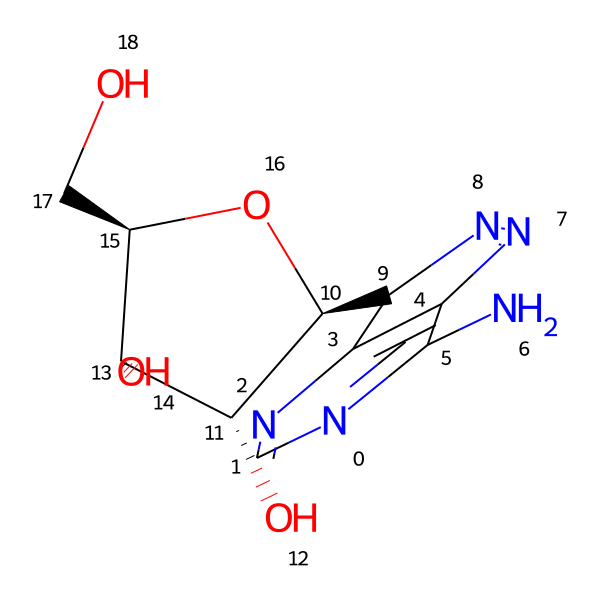

In [46]:
ref_m

In [47]:
# # Convert to an editable molecule
# editable_mol = Chem.RWMol(ref_m)

# # Remove the first atom (atom index 0, which corresponds to the first carbon)
# editable_mol.RemoveAtom(11)
# editable_mol.RemoveAtom(8)

# # Convert back to a normal molecule
# new_m = editable_mol.GetMol()

# # Optionally sanitize the molecule
# Chem.SanitizeMol(new_m)
# new_m

In [48]:
# # Convert to an editable molecule
# editable_mol = Chem.RWMol(ref_m)

# # Remove the first atom (atom index 0, which corresponds to the first carbon)
# editable_mol.RemoveAtom(10)

# # Convert back to a normal molecule
# new_m = editable_mol.GetMol()

# # Optionally sanitize the molecule
# Chem.SanitizeMol(new_m)
# new_m

In [49]:
# # 4np3_A_rec_5bze_68n_lig_tt_min_0
# editable_mol = Chem.RWMol(ref_m)
# editable_mol.RemoveAtom(11)
# editable_mol.RemoveAtom(10)
# editable_mol.RemoveAtom(9)
# # editable_mol.RemoveAtom(6)
# new_m = editable_mol.GetMol()
# Chem.SanitizeMol(new_m)
# new_m

In [50]:
def remove_atoms_from_ring(rdmol, atom_indices_to_remove):
    rdmol_edit = Chem.RWMol(rdmol)
    ring_info = rdmol.GetRingInfo()
    rings = [set(r) for r in ring_info.AtomRings()]

    for ring in rings:
        if any(idx in ring for idx in atom_indices_to_remove):
            # Remove bonds involving the atoms to be removed
            for idx in atom_indices_to_remove:
                if idx in ring:
                    for neighbor in rdmol.GetAtomWithIdx(idx).GetNeighbors():
                        if neighbor.GetIdx() not in atom_indices_to_remove:
                            rdmol_edit.RemoveBond(idx, neighbor.GetIdx())
                            neighbor.SetIsAromatic(False)
            
            # Remove the atoms themselves
            for idx in sorted(atom_indices_to_remove, reverse=True):
                if idx in ring:
                    rdmol_edit.RemoveAtom(idx)
    
    # Sanitize the molecule to ensure it is valid
    rdmol = rdmol_edit.GetMol()
    # Chem.SanitizeMol(rdmol)
    return rdmol

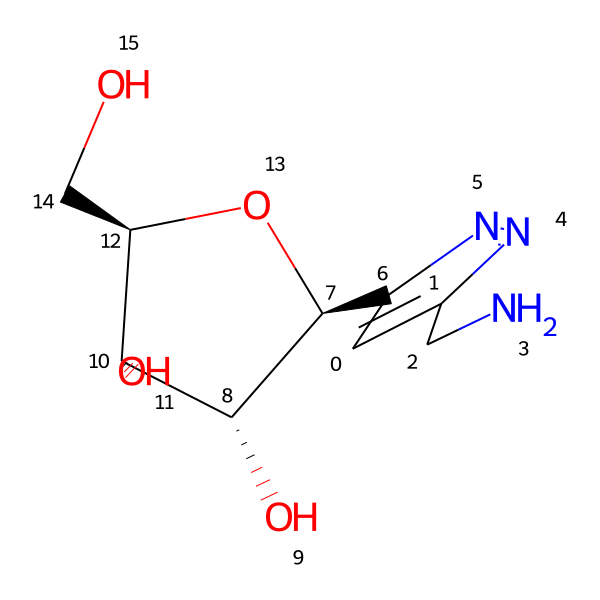

In [51]:
# # 1otx_A_rec_4tti_fmc_lig_tt_min_0

new_m = remove_atoms_from_ring(ref_m, [0, 1, 2])
Chem.AddHs(new_m)
Chem.SanitizeMol(new_m)

new_m

In [52]:
with Chem.SDWriter(os.path.join('ligand_based', folder_name, ligand_name+'.sdf')) as w:
    w.write(ref_m)

# with Chem.SDWriter(os.path.join('ligand_based', folder_name, ligand_name+'.sdf')) as w:
#     w.write(new_m)

In [53]:
# with Chem.SDWriter(os.path.join('structure_based', folder_name, ligand_name+'.sdf')) as w:
#     w.write(ref_m)

with Chem.SDWriter(os.path.join('structure_based', folder_name, ligand_name+'.sdf')) as w:
    w.write(new_m)